## Fractal Dimension Calculation

Code that Calculates the (Hausdorff) dimension having an image as an input

### Online code 1 - By Francesco Turci

In [142]:
# Import stuff
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(1200, 1200)
(1200, 1200)
(549284, 2)
======= Scale : 1.0069555500567189
======= Scale : 1.156527843988768
======= Scale : 1.328317475231124
======= Scale : 1.5256245875750167
======= Scale : 1.7522395252749765
======= Scale : 2.0125156469955634
======= Scale : 2.311452955477863
======= Scale : 2.654794149483264
======= Scale : 3.049134943208696
======= Scale : 3.5020507724510144
======= Scale : 4.022242321593873
======= Scale : 4.619702667045545
======= Scale : 5.305909248016363
======= Scale : 6.09404435246698
======= Scale : 6.999248353845983
======= Scale : 8.038910563390282
======= Scale : 9.23300328537105
======= Scale : 10.604465492612778
======= Scale : 12.179643492837325
======= Scale : 13.98879705120008
======= Scale : 16.066680691823574
======= Scale : 18.453211345350883
======= Scale : 21.19423516828088
======= Scale : 24.342408264974694
======= Scale : 27.958208231336336
======= Scale : 32.11109595230408
======= Scale : 36.88084997172205
======= Scale : 42.35909906834158
=

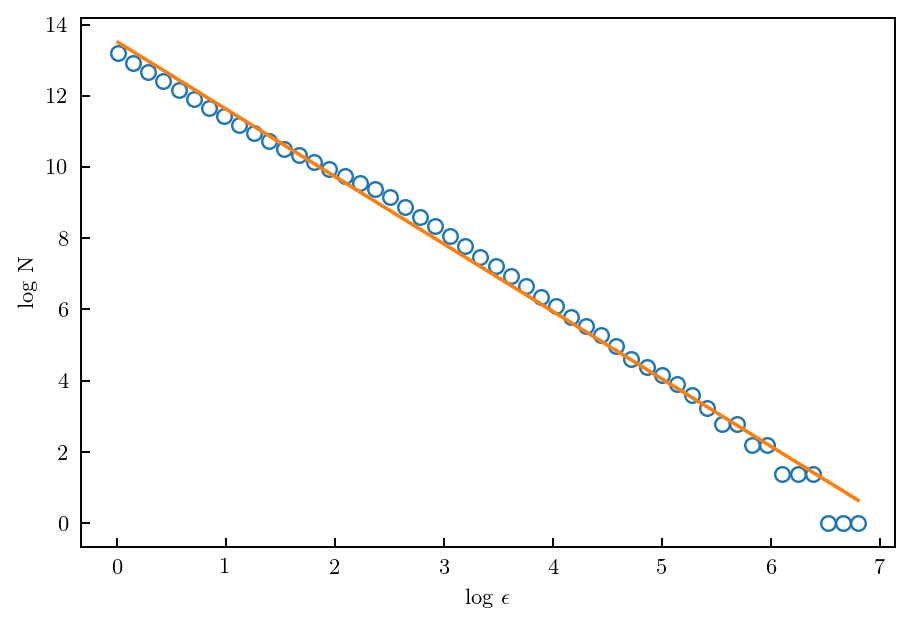

In [143]:
import numpy as np
import pylab as pl
 
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray


image = pl.imread("Sierpinski_carpet.png")
print(np.shape(image))
#image=pl.imread("chicago.png")
#image = image[:,:,0]

label_2 = (image<0.999)
im_2 = np.ones(np.shape(image))
im_2[label_2] = 0
image = im_2

# finding all the non-zero pixels
pixels=[]
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j]>0:
            pixels.append((i,j))
            
            
Lx=image.shape[1]
Ly=image.shape[0]

print (Lx, Ly)
pixels=pl.array(pixels)
# pl.plot(pixels[:,1], pixels[:,0], '.', ms=0.01)
# pl.show()
print (pixels.shape)

# computing the fractal dimension
#considering only scales in a logarithmic list
scales=np.logspace(0.01, 10, num=50, endpoint=False, base=2)
Ns=[]
# looping over several scales
for scale in scales:
    print "======= Scale :",scale
    # computing the histogram
    H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
    Ns.append(np.sum(H>0))
    
    
# linear fit, polynomial of degree 1
coeffs=np.polyfit(np.log(scales[:-2]), np.log(Ns[:-2]), 1)
plot_pretty() 
pl.plot(np.log(scales),np.log(Ns), 'o', mfc='none')
pl.plot(np.log(scales), np.polyval(coeffs,np.log(scales)))
pl.xlabel('log $\epsilon$')
pl.ylabel('log N')
pl.savefig('sierpinski_dimension.pdf')

print(coeffs)
print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficient
np.savetxt("scaling.txt", zip(scales,Ns))

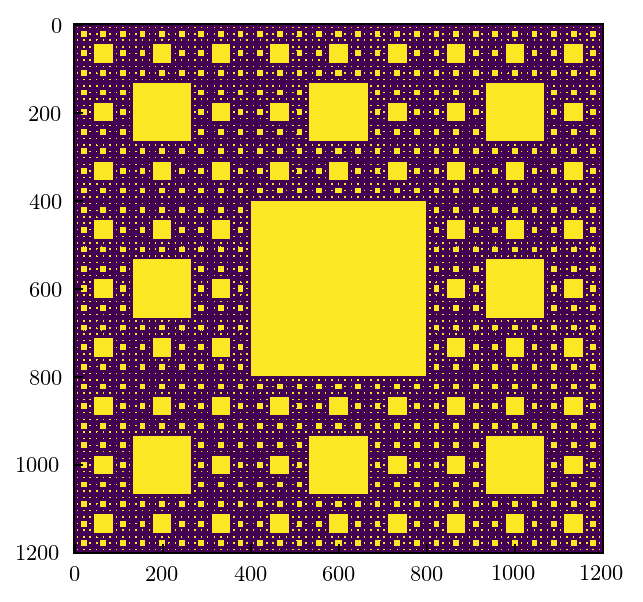

In [144]:
plt.imshow(image)

### Second code found online

In [145]:
import numpy as np
import scipy

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def fractal_dimension(Z, threshold=100):
    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])

    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

I = rgb2gray(scipy.misc.imread("chic_reg.jpeg"))
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

('Minkowski\xe2\x80\x93Bouligand dimension (computed): ', 1.4848547046836948)


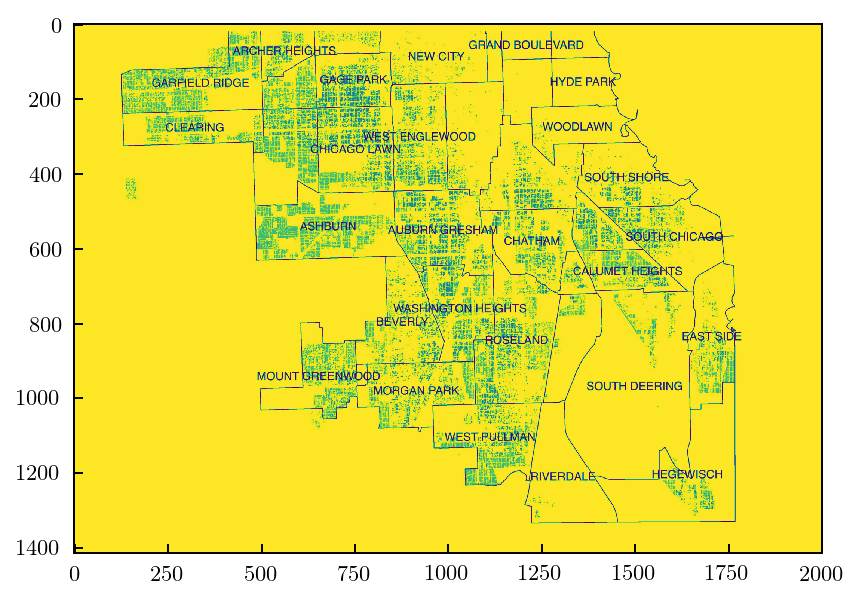

In [146]:
plt.imshow(I)

In [147]:
I = rgb2gray(scipy.misc.imread("Old_loop.jpg"))
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

('Minkowski\xe2\x80\x93Bouligand dimension (computed): ', 1.8428688325080405)


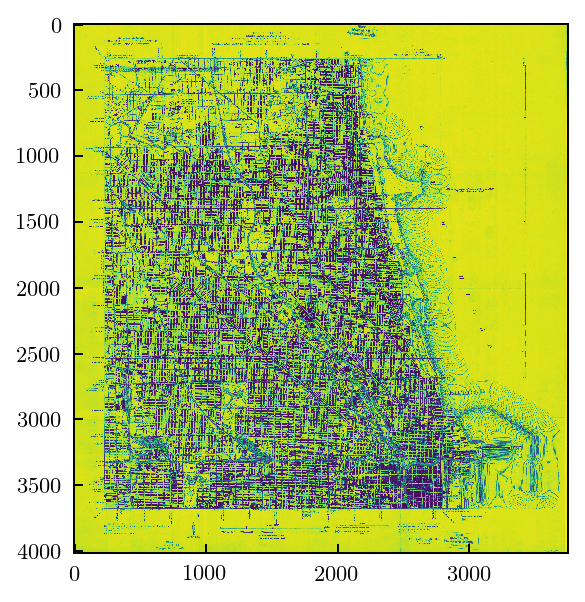

In [148]:
plt.imshow(I)

(2156, 1839)
(1594272, 2)
======= Scale : 1.0069555500567189
======= Scale : 1.156527843988768
======= Scale : 1.328317475231124
======= Scale : 1.5256245875750167
======= Scale : 1.7522395252749765
======= Scale : 2.0125156469955634
======= Scale : 2.311452955477863
======= Scale : 2.654794149483264
======= Scale : 3.049134943208696
======= Scale : 3.5020507724510144
======= Scale : 4.022242321593873
======= Scale : 4.619702667045545
======= Scale : 5.305909248016363
======= Scale : 6.09404435246698
======= Scale : 6.999248353845983
======= Scale : 8.038910563390282
======= Scale : 9.23300328537105
======= Scale : 10.604465492612778
======= Scale : 12.179643492837325
======= Scale : 13.98879705120008
======= Scale : 16.066680691823574
======= Scale : 18.453211345350883
======= Scale : 21.19423516828088
======= Scale : 24.342408264974694
======= Scale : 27.958208231336336
======= Scale : 32.11109595230408
======= Scale : 36.88084997172205
======= Scale : 42.35909906834158
======= Scale

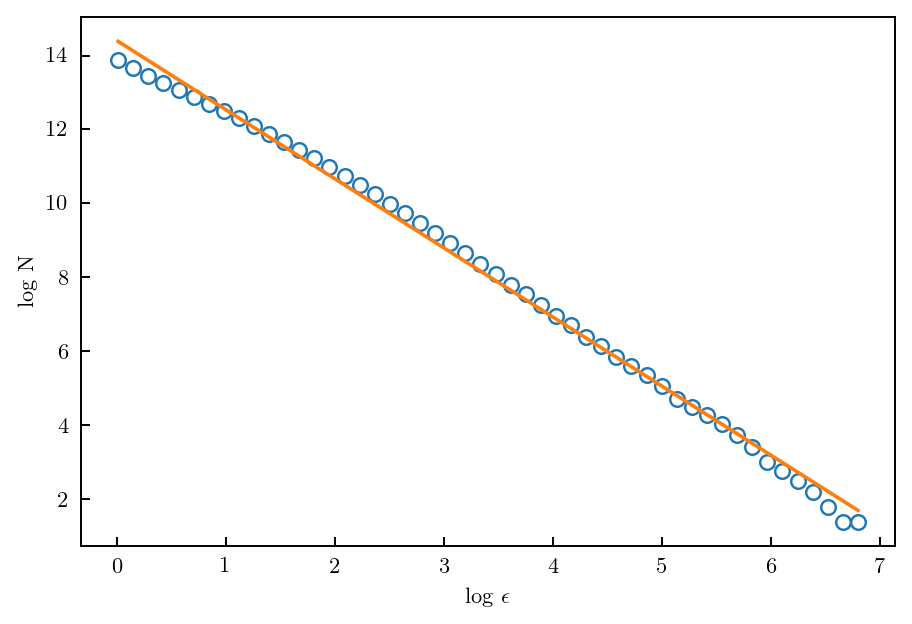

In [149]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
 
image=rgb2gray(pl.imread("chicago.png"))

label_2 = (image>0.80)
im_2 = np.ones(np.shape(image))
im_2[label_2] = 0.0
image = im_2


# finding all the non-zero pixels
pixels=[]
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j]>0:
            pixels.append((i,j))
            
            
Lx=image.shape[1]
Ly=image.shape[0]

print (Lx, Ly)
pixels=pl.array(pixels)
# pl.plot(pixels[:,1], pixels[:,0], '.', ms=0.01)
# pl.show()
print (pixels.shape)

# computing the fractal dimension
#considering only scales in a logarithmic list
scales=np.logspace(0.01, 10, num=50, endpoint=False, base=2)
Ns=[]
# looping over several scales
for scale in scales:
    print "======= Scale :",scale
    # computing the histogram
    H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
    Ns.append(np.sum(H>0))
    
    
# linear fit, polynomial of degree 1
coeffs=np.polyfit(np.log(scales[:-2]), np.log(Ns[:-2]), 1)
plot_pretty() 
pl.plot(np.log(scales),np.log(Ns), 'o', mfc='none')
pl.plot(np.log(scales), np.polyval(coeffs,np.log(scales)))
pl.xlabel('log $\epsilon$')
pl.ylabel('log N')
pl.savefig('sierpinski_dimension.pdf')

print(coeffs)
print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficient
np.savetxt("scaling.txt", zip(scales,Ns))

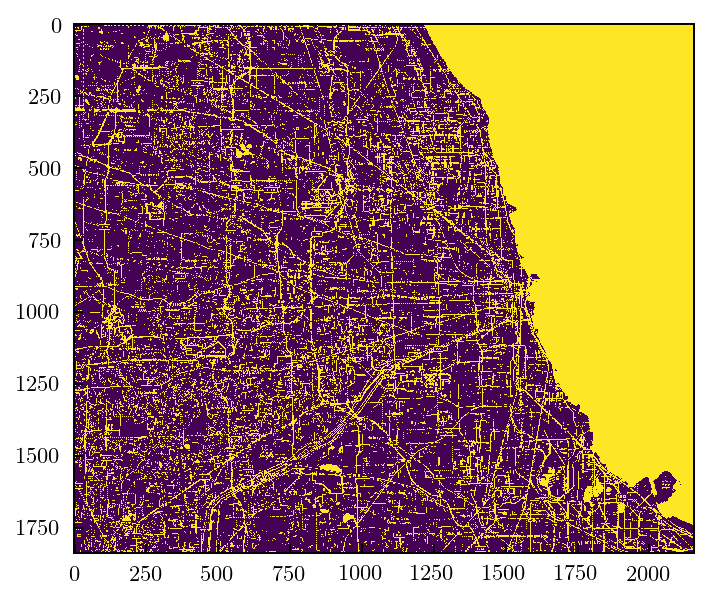

In [150]:
plt.imshow(image)

(1904, 2045)
(824136, 2)
======= Scale : 1.0069555500567189
======= Scale : 1.156527843988768
======= Scale : 1.328317475231124
======= Scale : 1.5256245875750167
======= Scale : 1.7522395252749765
======= Scale : 2.0125156469955634
======= Scale : 2.311452955477863
======= Scale : 2.654794149483264
======= Scale : 3.049134943208696
======= Scale : 3.5020507724510144
======= Scale : 4.022242321593873
======= Scale : 4.619702667045545
======= Scale : 5.305909248016363
======= Scale : 6.09404435246698
======= Scale : 6.999248353845983
======= Scale : 8.038910563390282
======= Scale : 9.23300328537105
======= Scale : 10.604465492612778
======= Scale : 12.179643492837325
======= Scale : 13.98879705120008
======= Scale : 16.066680691823574
======= Scale : 18.453211345350883
======= Scale : 21.19423516828088
======= Scale : 24.342408264974694
======= Scale : 27.958208231336336
======= Scale : 32.11109595230408
======= Scale : 36.88084997172205
======= Scale : 42.35909906834158
======= Scale 

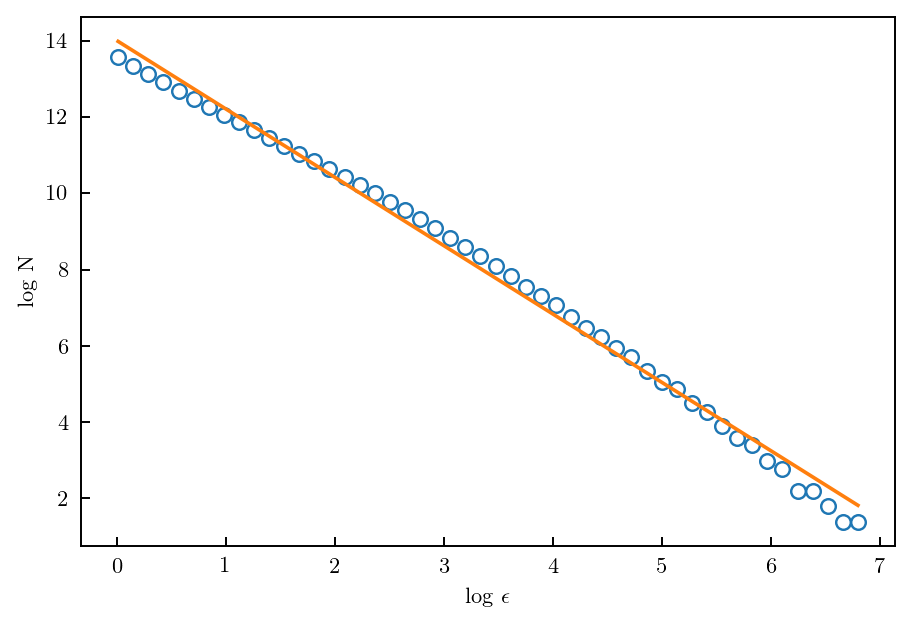

In [151]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
 
image=rgb2gray(pl.imread("Chicago_met.png"))

label_2 = (image>0.8)
im_2 = np.ones(np.shape(image))
im_2[label_2] = 0.0
image = im_2


# finding all the non-zero pixels
pixels=[]
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j]>0:
            pixels.append((i,j))
            
            
Lx=image.shape[1]
Ly=image.shape[0]

print (Lx, Ly)
pixels=pl.array(pixels)
# pl.plot(pixels[:,1], pixels[:,0], '.', ms=0.01)
# pl.show()
print (pixels.shape)

# computing the fractal dimension
#considering only scales in a logarithmic list
scales=np.logspace(0.01, 10, num=50, endpoint=False, base=2)
Ns=[]
# looping over several scales
for scale in scales:
    print "======= Scale :",scale
    # computing the histogram
    H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
    Ns.append(np.sum(H>0))
    
    
# linear fit, polynomial of degree 1
coeffs=np.polyfit(np.log(scales[:-2]), np.log(Ns[:-2]), 1)
plot_pretty() 
pl.plot(np.log(scales),np.log(Ns), 'o', mfc='none')
pl.plot(np.log(scales), np.polyval(coeffs,np.log(scales)))
pl.xlabel('log $\epsilon$')
pl.ylabel('log N')
pl.savefig('sierpinski_dimension.pdf')

print(coeffs)
print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficient
np.savetxt("scaling.txt", zip(scales,Ns))

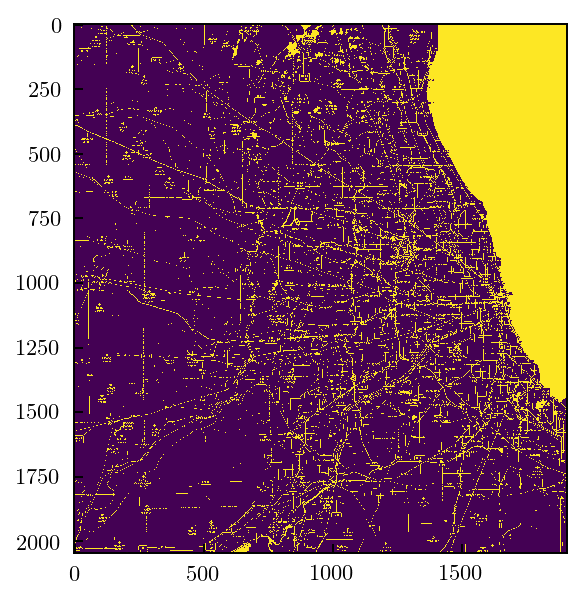

In [152]:
plt.imshow(image)

In [153]:
I = rgb2gray(scipy.misc.imread("Chicago_met.png"))
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

('Minkowski\xe2\x80\x93Bouligand dimension (computed): ', 1.3371320182079258)


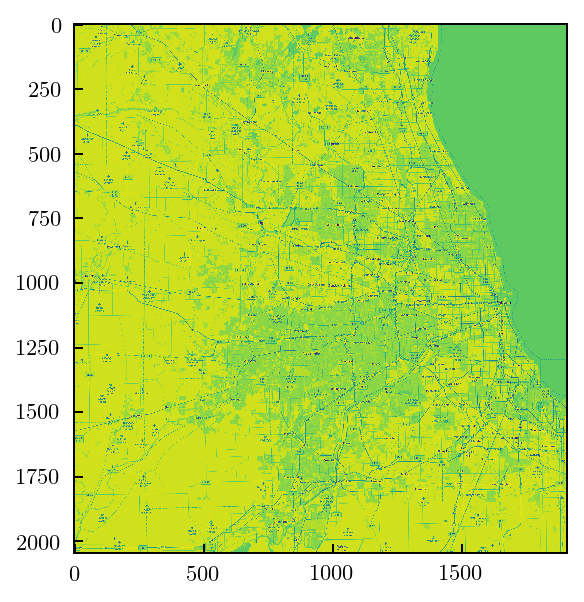

In [154]:
plt.imshow(I)